<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
[[5.1 3.5]
 [4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3.0]
 [4.3 3.0]
 [5.8 4.0]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.0 3.0]
 [5.0 3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.0 3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3.0]
 [5.1 3.4]
 [5.0 3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.0 3.5]
 [5.1 3.8]
 [4.8 3.0]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.0 3.3]
 [7.0 3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]


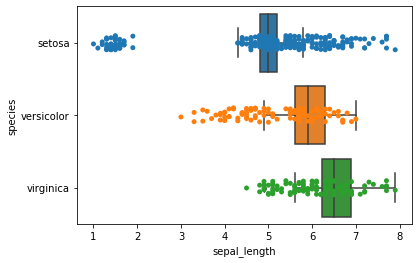

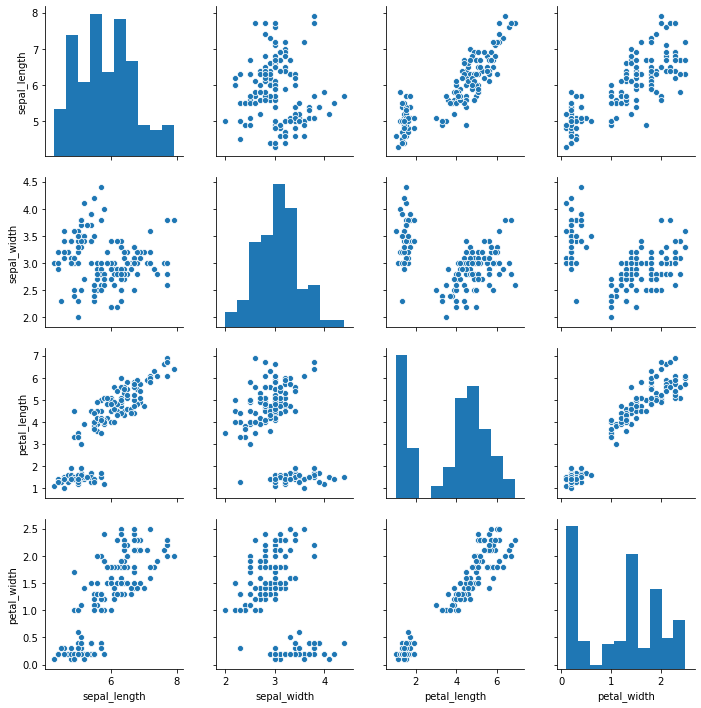

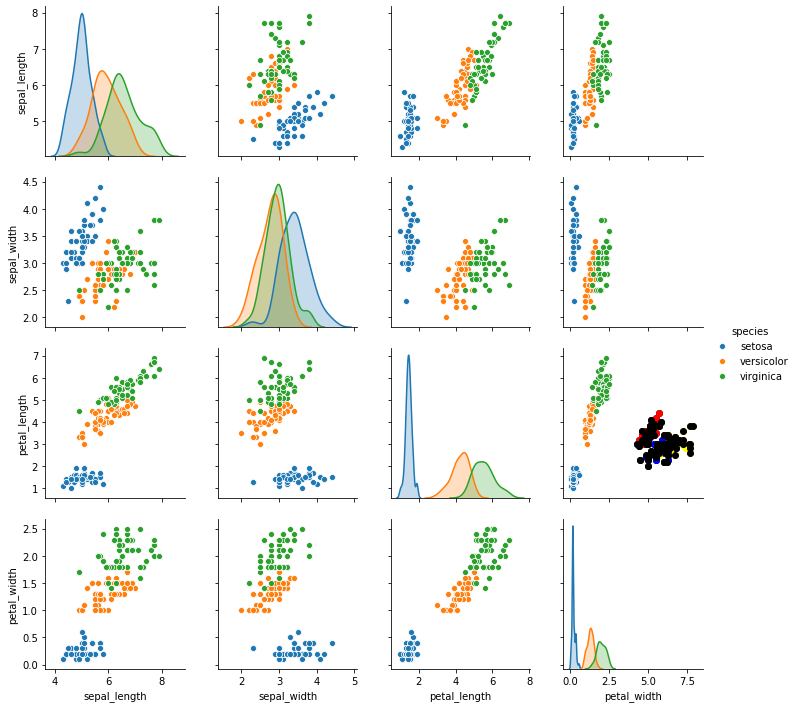

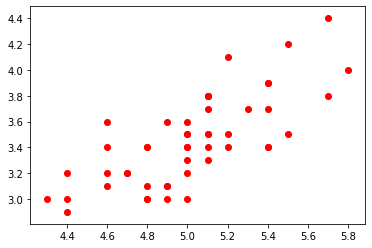

In [3]:
import seaborn as sns
#sns.get_dataset_names() # Data set that can be read
iris_data = sns.load_dataset("iris")
iris_data.info()
iris_data
#iris_data.species

iris_data.describe()

sns.stripplot(x="sepal_length",data=iris_data)

sns.stripplot(x="sepal_length",y="species",data=iris_data)

sns.stripplot(x="petal_length",y="species",data=iris_data)

sns.boxplot(x="sepal_length",y="species", data=iris_data)

sns.pairplot(iris_data)

sns.pairplot(iris_data,hue='species')

explanatory_variable_X=iris_data.values[:,[0,1,2,3]]
explanatory_variable_X=explanatory_variable_X[:,:2] # Extract sepal_length and sepal_width

y=iris_data.values[:,4]
y = [s.replace('setosa', '0') for s in y] # setosa is 0
y = [s.replace('versicolor', '1') for s in y] # versicolor is 1
y = [s.replace('virginica', '2') for s in y] # virginica is 2
y = [int(n) for n in y] # Change characters to numbers

import numpy as np
objective_variable_y = np.array(y) # NumPy's array

print(explanatory_variable_X)
print(objective_variable_y)

label_array=np.copy(objective_variable_y)
label_array[0:100]= -1

import matplotlib.pyplot as plt
plt.scatter(explanatory_variable_X[label_array==0,0],explanatory_variable_X[label_array==0,1],c = 'red')
plt.scatter(explanatory_variable_X[label_array==1,0],explanatory_variable_X[label_array==1,1],c = 'blue')
plt.scatter(explanatory_variable_X[label_array==2,0],explanatory_variable_X[label_array==2,1],c = 'yellow')
plt.scatter(explanatory_variable_X[label_array==-1,0],explanatory_variable_X[label_array==-1,1],c = 'black')

#np.random.choice(range(0,10)) # Returns one of 0-9
#np.random.choice(range(0,10), 5) # Returns five of 0-9
#np.random.choice(range(0,10), 5, replace=False) # Returns five of 0-9 without duplicate
lower_limit_of_range=0
upper_limit_of_range=objective_variable_y.size
randomize_rate=0.7
number_to_randomize=int((objective_variable_y.size)*randomize_rate)
index_without_label=np.random.choice(range(lower_limit_of_range,upper_limit_of_range),number_to_randomize,replace=False)
print(index_without_label)
l = len(index_without_label)
print(l)

array_with_duplicates_removed=set(index_without_label) # set removes duplicated arrays
print(array_with_duplicates_removed)
l = len(array_with_duplicates_removed)
print(l)

label_array=np.copy(objective_variable_y)
label_array[index_without_label] = -1
print(label_array)

plt.scatter(explanatory_variable_X[label_array==0,0],explanatory_variable_X[label_array==0,1],c = 'red')
plt.scatter(explanatory_variable_X[label_array==1,0],explanatory_variable_X[label_array==1,1],c = 'blue')
plt.scatter(explanatory_variable_X[label_array==2,0],explanatory_variable_X[label_array==2,1],c = 'yellow')
plt.scatter(explanatory_variable_X[label_array==-1,0],explanatory_variable_X[label_array==-1,1],c = 'black')

from sklearn.semi_supervised import LabelPropagation

label_propagation=LabelPropagation(max_iter=10000) # Maximum number of repetitions
label_propagation.fit(explanatory_variable_X,label_array) # Learning
Predicted_y=label_propagation.predict(explanatory_variable_X)
print(Predicted_y)

# 
plt.figure()
plt.scatter(explanatory_variable_X[Predicted_y==0,0],explanatory_variable_X[Predicted_y==0,1],c = 'red')
plt.show()
